In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#WRITE CODE HERE IMPORT THE DATA AS 'data'
data = pd.read_csv('train.csv')

In [3]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['BusinessTravel'] = labelencoder.fit_transform(data['BusinessTravel'])
data['Department'] = labelencoder.fit_transform(data['Department'])
data['EducationField'] = labelencoder.fit_transform(data['EducationField'])
data['Gender'] = labelencoder.fit_transform(data['Gender'])
data['JobRole'] = labelencoder.fit_transform(data['JobRole'])
data['MaritalStatus'] = labelencoder.fit_transform(data['MaritalStatus'])
data['OverTime'] = labelencoder.fit_transform(data['OverTime'])

In [4]:
data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,0,1,2,3,3,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,2,1,12,4,1,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,2,2,2,1,3,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,2,1,24,1,1,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,2,1,3,3,4,689,3,...,3,1,10,2,10,7,7,8,1,1


In [5]:
x_input = data[['Age','BusinessTravel','Department','DistanceFromHome','Education','EducationField','EmployeeNumber','EnvironmentSatisfaction','Gender','JobInvolvement','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','CommunicationSkill','Behaviour'
]]
y_output = data[['Attrition']]

In [6]:
X = np.asarray(x_input)
y = np.asarray(y_output)

In [7]:
y

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold

In [9]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1465, 27) (1465, 1)
Test set: (163, 27) (163, 1)


In [10]:
# StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each class.
cv = StratifiedKFold(n_splits=10, shuffle = False, random_state = 76)

D:\software\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [11]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Random Forest Classifier
clf_rfc = RandomForestClassifier()
# fit model
clf_rfc.fit(X_train, y_train)
# make class predictions for the validation set
y_pred_class_rfc = cross_val_predict(clf_rfc, X_train, y_train, cv = cv)
# predicted probabilities for class 1
#y_pred_prob_rfc = cross_val_predict(clf_rfc, X_train, y_train, cv = cv, method="predict_proba")
#y_pred_prob_rfc_class1 = y_pred_prob_rfc[:, 1]

In [14]:
from sklearn import metrics

# USE THE IMPORTED CONFUSION MATRIX
cnf_matrix_train = metrics.confusion_matrix(y_train, clf_rfc.predict(X_train))
print("Confusion Matrix of Training Data: " + str(cnf_matrix_train))
TP_tr = cnf_matrix_train[1, 1]
TN_tr = cnf_matrix_train[0, 0]
FP_tr = cnf_matrix_train[0, 1]
FN_tr = cnf_matrix_train[1, 0]

cnf_matrix_test = metrics.confusion_matrix(y_test, clf_rfc.predict(X_test))
print("\nConfusion Matrix of Testing Data: " + str(cnf_matrix_test))
TP_ts = cnf_matrix_test[1, 1]
TN_ts = cnf_matrix_test[0, 0]
FP_ts = cnf_matrix_test[0, 1]
FN_ts = cnf_matrix_test[1, 0]

Confusion Matrix of Training Data: [[759   0]
 [  0 706]]

Confusion Matrix of Testing Data: [[80  4]
 [ 0 79]]


In [15]:
print("\nAccuracy of Training: ",metrics.accuracy_score(y_train, clf_rfc.predict(X_train)))
print("Accuracy of Testing: ",metrics.accuracy_score(y_test, clf_rfc.predict(X_test)))


Accuracy of Training:  1.0
Accuracy of Testing:  0.9754601226993865


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
yhat_train = clf_rfc.predict_proba(X_train)

In [19]:
yhat = clf_rfc.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.95      1.00      0.98        79

    accuracy                           0.98       163
   macro avg       0.98      0.98      0.98       163
weighted avg       0.98      0.98      0.98       163

Confusion matrix, without normalization
[[80  4]
 [ 0 79]]


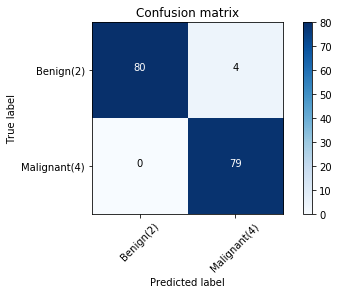

In [20]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [21]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9754638173511933

In [22]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9754601226993865

In [23]:
yhat

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [24]:
predict_output = clf_rfc.predict_proba(X_train)
predict_output

array([[0.83, 0.17],
       [0.97, 0.03],
       [0.9 , 0.1 ],
       ...,
       [0.98, 0.02],
       [0.9 , 0.1 ],
       [0.01, 0.99]])

In [25]:
predict_output = clf_rfc.predict_proba(X_test)
predict_output

array([[0.01, 0.99],
       [0.8 , 0.2 ],
       [0.61, 0.39],
       [0.67, 0.33],
       [0.89, 0.11],
       [0.02, 0.98],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.92, 0.08],
       [0.8 , 0.2 ],
       [0.03, 0.97],
       [0.03, 0.97],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.97, 0.03],
       [0.88, 0.12],
       [0.02, 0.98],
       [0.8 , 0.2 ],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.92, 0.08],
       [0.01, 0.99],
       [0.87, 0.13],
       [0.91, 0.09],
       [0.8 , 0.2 ],
       [0.82, 0.18],
       [0.94, 0.06],
       [0.3 , 0.7 ],
       [0.86, 0.14],
       [0.77, 0.23],
       [0.66, 0.34],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.03, 0.97],
       [0.77, 0.23],
       [0.79, 0.21],
       [0.01, 0.99],
       [0.75, 0.25],
       [0.71, 0.29],
       [0.92, 0.08],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.72, 0.28],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.87,

In [26]:
yhat_train

array([[0.83, 0.17],
       [0.97, 0.03],
       [0.9 , 0.1 ],
       ...,
       [0.98, 0.02],
       [0.9 , 0.1 ],
       [0.01, 0.99]])

In [27]:
roc_auc_rfc = cross_val_score(clf_rfc, X_train, y_train, cv = cv, scoring = 'roc_auc').mean()
roc_auc_rfc

0.9999060150375939

In [38]:
# test.csv
new_dataframe = pd.read_csv('test.csv')

In [39]:
new_dataframe.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [40]:
#hot coding
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
new_dataframe['BusinessTravel'] = labelencoder.fit_transform(new_dataframe['BusinessTravel'])
new_dataframe['Department'] = labelencoder.fit_transform(new_dataframe['Department'])
new_dataframe['EducationField'] = labelencoder.fit_transform(new_dataframe['EducationField'])
new_dataframe['Gender'] = labelencoder.fit_transform(new_dataframe['Gender'])
new_dataframe['JobRole'] = labelencoder.fit_transform(new_dataframe['JobRole'])
new_dataframe['MaritalStatus'] = labelencoder.fit_transform(new_dataframe['MaritalStatus'])
new_dataframe['OverTime'] = labelencoder.fit_transform(new_dataframe['OverTime'])

In [41]:
x_id_tt = new_dataframe.drop(["Id"],axis=1)
predi = clf_rfc.predict_proba(x_id_tt)
y_predprob=[row[1] for row in predi]
new_dataframe["Predictions1"]=y_predprob
new_dataframe["Predictions1"]

0      0.15
1      0.03
2      0.18
3      0.16
4      0.06
       ... 
465    0.54
466    0.70
467    0.40
468    0.13
469    0.21
Name: Predictions1, Length: 470, dtype: float64

In [42]:
predi

array([[0.85, 0.15],
       [0.97, 0.03],
       [0.82, 0.18],
       [0.84, 0.16],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.35, 0.65],
       [0.91, 0.09],
       [0.77, 0.23],
       [0.88, 0.12],
       [0.94, 0.06],
       [0.7 , 0.3 ],
       [0.87, 0.13],
       [1.  , 0.  ],
       [0.94, 0.06],
       [0.88, 0.12],
       [0.6 , 0.4 ],
       [0.83, 0.17],
       [0.82, 0.18],
       [0.99, 0.01],
       [0.96, 0.04],
       [0.53, 0.47],
       [0.82, 0.18],
       [0.94, 0.06],
       [0.89, 0.11],
       [0.95, 0.05],
       [0.92, 0.08],
       [0.91, 0.09],
       [0.27, 0.73],
       [0.88, 0.12],
       [0.9 , 0.1 ],
       [0.87, 0.13],
       [0.72, 0.28],
       [0.58, 0.42],
       [0.98, 0.02],
       [0.95, 0.05],
       [0.87, 0.13],
       [0.82, 0.18],
       [0.75, 0.25],
       [0.85, 0.15],
       [0.38, 0.62],
       [0.84, 0.16],
       [0.96, 0.04],
       [0.9 , 0.1 ],
       [0.93, 0.07],
       [0.9 , 0.1 ],
       [0.85, 0.15],
       [0.81,

In [43]:
y_predprob

[0.15,
 0.03,
 0.18,
 0.16,
 0.06,
 0.08,
 0.65,
 0.09,
 0.23,
 0.12,
 0.06,
 0.3,
 0.13,
 0.0,
 0.06,
 0.12,
 0.4,
 0.17,
 0.18,
 0.01,
 0.04,
 0.47,
 0.18,
 0.06,
 0.11,
 0.05,
 0.08,
 0.09,
 0.73,
 0.12,
 0.1,
 0.13,
 0.28,
 0.42,
 0.02,
 0.05,
 0.13,
 0.18,
 0.25,
 0.15,
 0.62,
 0.16,
 0.04,
 0.1,
 0.07,
 0.1,
 0.15,
 0.19,
 0.06,
 0.23,
 0.47,
 0.1,
 0.32,
 0.45,
 0.3,
 0.26,
 0.07,
 0.49,
 0.01,
 0.13,
 0.16,
 0.06,
 0.34,
 0.04,
 0.15,
 0.19,
 0.11,
 0.1,
 0.23,
 0.18,
 0.32,
 0.04,
 0.17,
 0.32,
 0.26,
 0.5,
 0.05,
 0.28,
 0.06,
 0.47,
 0.09,
 0.31,
 0.2,
 0.07,
 0.21,
 0.16,
 0.19,
 0.14,
 0.17,
 0.55,
 0.31,
 0.15,
 0.49,
 0.21,
 0.74,
 0.46,
 0.27,
 0.1,
 0.07,
 0.03,
 0.18,
 0.14,
 0.11,
 0.19,
 0.19,
 0.3,
 0.08,
 0.13,
 0.18,
 0.13,
 0.14,
 0.28,
 0.15,
 0.15,
 0.25,
 0.09,
 0.05,
 0.11,
 0.1,
 0.2,
 0.44,
 0.27,
 0.07,
 0.33,
 0.37,
 0.08,
 0.05,
 0.26,
 0.44,
 0.15,
 0.22,
 0.04,
 0.19,
 0.16,
 0.12,
 0.15,
 0.72,
 0.14,
 0.41,
 0.04,
 0.21,
 0.25,
 0.06,
 0.06,
 0.1,
 

In [46]:
id_index = new_dataframe.Id

In [47]:
id_index

0        1
1        2
2        3
3        4
4        5
      ... 
465    466
466    467
467    468
468    469
469    470
Name: Id, Length: 470, dtype: int64

In [48]:
MySubmission = pd.DataFrame({'id':new_dataframe.Id,'Attrition':y_predprob})
MySubmission

,id,Attrition
0,1,0.15
1,2,0.03
2,3,0.18
3,4,0.16
4,5,0.06
...,...,...
465,466,0.54
466,467,0.70
467,468,0.40
468,469,0.13


In [49]:
MySubmission.to_csv('MySubmission.csv', index=False)